<a href="https://colab.research.google.com/github/rpasquini/metodos_cuantitativos/blob/main/notebooks/R/1_Introduccion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


Autor: Ricardo Pasquini 2025
rpasquini@utdt.edu


# Introducción
En este notebook introduciremos algunas de las principales librerías con las que vamos a estar trabajando. Nuestro objetivo inicial es estimar un modelo de regresión simple utilizando datos de alquileres de 2019.


## Donde estamos

Nuestro ambiente de trabajo ahora es un *notebook* que permite correr codigo, procesar datos, imprimir gráficos, etc. Estos notebooks en general se conocen como "Jupyter notebooks" y tienen como particularidad que el  entorno visual en el que trabajan vive en el navegador. En este momento además, el notebook con el que trabajan "vive en la nube" de Google Colaboratory. Utiliza recursos de la nube de Google para procesar los datos, etc. Para trabajar con nuestros propios datos tendremos que hacerlos accesibles a Google Colab (subiendo los datos al Colab o subiendo los datos a otro servidor al cual las librerias que usemos puedan acceder)

Comentarios relacionados:

- Como dijimos el notebook es solo un entorno visual. En este notebook vamos a trabajar con librerias de análisis cuantitativo construidas sobre el lenguaje Python. Los notebooks de Colab tambien pueden correr código de R.
- Trabajar en la nube "Colab" es conveniente para una clase. También es posible (y a veces necesario) trabajar con un Jupyter Notebook instalado "localmente" en sus computadoras.

- El ambiente virtual provisto por Google Colab va a borrar todo el contenido que se aloje en la memoria virtual después de un rato de inactividad. Lo unico que se mantiene es lo que está escrito en el notebook (el codigo y el texto explicativo). Esto implica que el notebook debe contener todo el codigo desde la carga de los datos hasta su resultado final para que pueda ser reproducido en cualquier momento.


# Librerías con las que vamos a trabajar

Vamos a arrancar con estas:

- sf: Para trabajar y manipular datos espaciales en R (equivalente a geopandas en Python).
- dplyr: Para manipulación de datos tabulares (equivalente a pandas).
- ggplot2: Para gráficos.

Al respecto del uso de librerías, además debemos tener en cuenta:

- En general para usar las librerías tienen que estar *instaladas* y además *cargadas* al ambiente de trabajo en el que estemos.
- Los Notebooks de R pueden requerir instalar paquetes usando install.packages().
- Para cargar un paquete se usa library().


## Instalamos e importamos sf, dplyr y ggplot2


In [ ]:
# Cuidado tarda mucho en instalar esta libreria (15 minutos)
install.packages('sf')

In [4]:
library(sf)
library(dplyr)
library(ggplot2)

Linking to GEOS 3.12.1, GDAL 3.8.4, PROJ 9.3.1; sf_use_s2() is TRUE


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




Ahora cargamos sf. Una vez cargada, la libreria en cuestion vive en el ambiente de trabajo. En R usamos library() para cargar paquetes.


La fuente de los datos es Properati [properati.com.ar/data/](https://properati.com.ar/data/).
Fue descargada haciendo un pedido a su base de datos disponible en Google Big Query


El método st_read me permite levantar datos desde un archivo y convertirlos en un objeto **sf** (spatial features)


In [5]:
# download the zip file locally
download.file("https://github.com/rpasquini/urban-econometrics/blob/master/data/departamentos2019amba.zip?raw=true",
              destfile = "departamentos2019amba.zip", mode = "wb") # Use mode = "wb" for binary files
# Unzip the downloaded file
unzip("departamentos2019amba.zip", exdir = ".") # Extract to the current directory

# Read the shapefile from the unzipped contents
# Assuming the main shapefile is named 'departamentos2019amba.shp'
departamentos <- st_read("departamentos2019amba.shp")


Reading layer `departamentos2019amba' from data source 
  `/content/departamentos2019amba.shp' using driver `ESRI Shapefile'
Simple feature collection with 50653 features and 28 fields
Geometry type: POINT
Dimension:     XY
Bounding box:  xmin: 50978.57 ymin: 62684.22 xmax: 142256.9 ymax: 151715.8
Projected CRS: Transverse_Mercator


In [6]:
head(departamentos)


ERROR while rich displaying an object: Error in loadNamespace(x): there is no package called ‘geojsonio’

Traceback:
1. sapply(x, f, simplify = simplify)
2. lapply(X = X, FUN = FUN, ...)
3. FUN(X[[i]], ...)
4. tryCatch(withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler), error = outer_handler)
5. tryCatchList(expr, classes, parentenv, handlers)
6. tryCatchOne(expr, names, parentenv, handlers[[1L]])
7. doTryCatch(return(expr), name, parentenv, handler)
8. withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = 

bathrooms bedrooms country   created_on currency
1  1         1       Argentina 2019-09-26 ARS     
2  3        NA       Argentina 2019-09-26 ARS     
3  1         2       Argentina 2019-09-26 ARS     
4 NA        NA       Argentina 2019-09-26 ARS     
5  1         1       Argentina 2019-09-26 ARS     
6 NA        NA       Argentina 2019-09-26 ARS     
  descriptio                                                                                                                                                                                                                                                    
1 CODIGO: 1819-CRI180 ubicado en: Av. Callao 1800 -  Publicado por: TIXE NEGOCIOS INMOBILIARIOS. El precio es de ARS 18000 null. Impresionante ubicación. Recoleta. A. Callao y Av. Alvear. Espectacular ubicación junto al Paseo de la Recoleta, Av. Libertador
2 Residencia de estudiantes y viajeros. Son dos propiedades dentro de edificio.<br><br>La propiedad cuenta con 10  habitaciones, algunas para compartir debido a su amplitud en superficie, y otras para uso individual. una de ellas cuentan con baño propio. t
3 CODIGO: 1348-AF021227 ubicado en: Tacuari 263 -  Publicado por: BARRERA Y ASOCIADOS. El precio es de ARS 18500 null. 3 ambientes planta baja con patio, bajas expensas. Cocina y termotanque eléctricos, nuevos, se colocan antes del comienzo del contrato. N
4 Departamento de dos ambientes a 200 metros de Av. Peron y Ruta 3.<br>La unidad se encuentra en segundo piso contrafrente por escalera y cuenta con todos los servicios, muebles de bajo mesada y alacena, cocina y estractor, baño completo con bañera y dormi
5 CODIGO: 733-1600MARIANOA ubicado en: MARIANO ACHA 1600 -  Publicado por: ALICIA ROJAS NEGOCIOS INMOBILIARIOS. El precio es de ARS 18500 null. EXCELENTE DTO PLANTA BAJA CFTE DE 2 AMBIENTES 49 MTS TOTALES - AMPLIO, COMODO Y BUENA DISTRIBUCIÓN - DORMITORIO 
6 MONOAMBIENTE EN ALMAGRO<br>AMPLIO Y LUMINOSO<br>AMBIENTE CON PLACAR<br>COCINA INDEPENDIENTE<br>BAÑO CON VENTILACIÓN NATURAL                                                                                                                                   
  developmen end_date   index l1        geometry                  ⋯ price
1 NA         2019-10-10 0     Argentina POINT (106827.3 104558.6) ⋯ 18000
2 NA         2019-11-04 1     Argentina POINT (106347.9 102524.7) ⋯ 45000
3 NA         2019-09-28 2     Argentina POINT (107658.3 102034.1) ⋯ 18500
4 NA         2020-02-12 4     Argentina POINT (91709.24 94331.75) ⋯ 11000
5 NA         2019-11-10 5     Argentina POINT (99129.69 105739.1) ⋯ 18500
6 NA         2019-10-02 6     Argentina POINT (103825.4 102026.2) ⋯  9000
  price_peri rooms start_date surface_co surface_to
1 Mensual    NA    2019-09-26  52         58       
2 Mensual    NA    2019-09-26 219        219       
3 Mensual    NA    2019-09-26  61         67       
4 Mensual    NA    2019-09-26  38         38       
5 Mensual    NA    2019-09-26  39         49       
6 Mensual     1    2019-09-26  30         30       
  title                                                                                        
1 Recoleta. Av. Callao y Av. Alvear. Piso alto. 2 Amb. Balcón. Vistas                          
2 Departamento - Balvanera                                                                     
3 3 ambientes con patio 61 m2 propios bajas expensas                                           
4 Departamento - San Justo                                                                     
5 EXCELENTE DEPARTAMENTO 2 AMB CON PATIO 49 MTS - A 3 C/ SUBTE - MARIANO ACHA 1600 - V. URQUIZA
6 Departamento - Almagro                                                                       
  type         type_i18n    geometry                 
1 Departamento Departamento POINT (106827.3 104558.6)
2 Departamento Departamento POINT (106347.9 102524.7)
3 Departamento Departamento POINT (107658.3 102034.1)
4 Departamento Departamento POINT (91709.24 94331.75)
5 Departamento Departa

## Descripcion rápida de los datos


In [7]:
colnames(departamentos)


[1] "bathrooms"  "bedrooms"   "country"    "created_on" "currency"  
 [6] "descriptio" "developmen" "end_date"   "index"      "l1"        
[11] "l2"         "l3"         "l4"         "l5"         "l6"        
[16] "lat"        "lon"        "operation"  "operation_" "price"     
[21] "price_peri" "rooms"      "start_date" "surface_co" "surface_to"
[26] "title"      "type"       "type_i18n"  "geometry"

In [8]:
dim(departamentos)


[1] 50653    29

Puedo llamar a una columna en particular del dataframe si la escribo entre corchetes


In [ ]:
departamentos[['l2']]


En algunos casos funcionará que solo escriba $ y el nombre de la columna. (esto no sirve, por ejemplo si las columnas  tienen espacios en el nombre)


In [ ]:
departamentos$l2


Luego puedo ver cuales son los valores unicos que toma la variable:


In [ ]:
unique(departamentos$l2)


In [ ]:
sapply(departamentos, class)


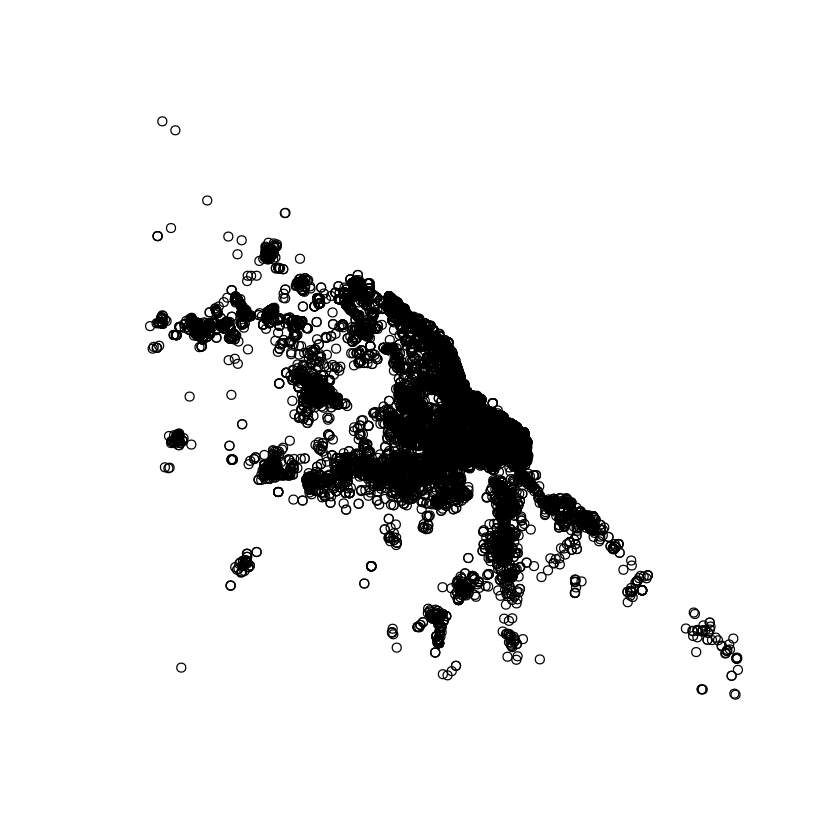

In [9]:
plot(st_geometry(departamentos))


In [ ]:
summary(departamentos$price)


## Estudiando un subconjunto de datos (filas del dataframe)

Para "filtrar" el dataframe usamos dplyr::filter o base R con condiciones.

Por ejemplo, si queremos departamentos mayores a $100000:
departamentos_filtrados <- departamentos %>% filter(price > 100000)

Para escribir una condicion recuerden que pueden utilizar los siguientes lógicos:

```==    para chequear la  condicion "equivale a" o "igual a" va doble igual  ```

```!= distinto a ```

```> mayor a  ```

```>= mayor o igual a ```

```< menor a ```

```<= menor o igual a ```

En el caso de querer usar dos condiciones o más:

```(esta condicion) & (esta condicion) ``` Se cumple esta condicion Y esta otra

```(esta condicion) | (esta condicion) ``` Se cumple esta condicion O esta otra


Recuerden que las condiciones tiene que ir  en parentesis!

Vean los siguientes ejemplos:


Filtrar los departamentos que estan en Capital Federal


In [ ]:
departamentos %>% filter(l2 == "Capital Federal")


Filtrar los departamentos que valen más de $100000 Y que además estan en capital federal


In [ ]:
departamentos %>% filter(price > 100000 & l2 == "Capital Federal")


Es posible combinar los filtros con otros metodos para describir o graficar los datos en una sola linea de codigo. Para eso filtro primero y grafico o describo despues.


In [ ]:
departamentos %>% filter(l2 == "Capital Federal") %>% pull(price) %>% summary()


In [ ]:
hist(departamentos$price)


In [ ]:
departamentos %>% filter(price < 30000) %>% pull(price) %>% hist()


El método plot() en el objeto sf permite mapear los datos. Podrán reconocer el AMBA


In [ ]:
plot(st_geometry(departamentos))


In [ ]:
departamentos %>% filter(l2 == "Capital Federal") %>% st_geometry() %>% plot()


In [ ]:
departamentos %>%
  filter(l2 == "Capital Federal" & price < 80000) %>%
  ggplot() +
  geom_sf(aes(fill = price)) +
  scale_fill_viridis_c() +
  theme_void()


# OLS


En R usamos la función lm() para estimar modelos de regresión lineal


Nuestro modelo a explorar es el siguiente:


$price_i=\beta_0+ \beta_1*bedrooms_i+\epsilon_i$


In [ ]:
modelo <- lm(price ~ bedrooms, data = departamentos)


In [ ]:
summary(modelo)


Nuestro resultado es:
precio= 11500+ 4253* bedrooms


## Graficando


El dataframe tiene algunos metodos que permiten graficar directamente usando ggplot2


In [ ]:
departamentos <- departamentos %>% filter(!is.na(bedrooms) & !is.na(price))


In [ ]:
ggplot(departamentos, aes(x = bedrooms, y = price)) +
  geom_point() +
  theme_minimal()


Scatter plot


In [ ]:
departamentos %>%
  filter(bedrooms > 0) %>%
  ggplot(aes(x = bedrooms, y = price)) +
  geom_point() +
  theme_minimal()


Para hacer otros graficos más complejos vamos a usar ggplot2 con líneas de predicción


In [ ]:
ypred <- predict(modelo, departamentos)

ggplot(departamentos, aes(x = bedrooms, y = price)) +
  geom_point(alpha = 0.5, color = "blue") +
  geom_line(aes(y = ypred), color = "red", size = 1) +
  labs(title = "Datos vs Predicción OLS",
       x = "Bedrooms", y = "Price") +
  theme_minimal()


# Ejemplo de ploteo con layers (capas)
Vamos a utilizar la capa de límites de partidos y departamentos del IGN.
Ver más aqui:
https://datos.gob.ar/dataset/ign-unidades-territoriales


In [ ]:
limites <- st_read("https://github.com/rpasquini/urban-econometrics/blob/master/data/ign_departamento.zip?raw=true")
# En caso de tener el zip en el espacio local: limites <- st_read("ign_departamento.zip")


In [ ]:
ggplot() +
  geom_sf(data = st_transform(limites, 4326), fill = "lightblue", alpha = 0.5) +
  geom_sf(data = st_transform(departamentos, 4326), color = "orange", size = 0.1) +
  coord_sf(xlim = c(-59, -58), ylim = c(-35, -34.1)) +
  theme_void()


In [ ]:
ggplot() +
  geom_sf(data = st_transform(limites, 4326), fill = "lightgray", alpha = 0.5) +
  geom_sf(data = departamentos %>%
            filter(price < 80000) %>%
            st_transform(4326),
          aes(fill = price), size = 0.1) +
  scale_fill_viridis_c() +
  coord_sf(xlim = c(-59, -58), ylim = c(-35, -34.1)) +
  theme_void() +
  labs(title = "Precios de departamentos menores a $80,000")
